# Importing libraries and reading in Close Price data

In [185]:
# Import libraries
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import seaborn as sns

In [2]:
# Read in Close price data
close_df = pd.read_csv('close_df.csv')
close_df.head()


,Date,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
0,2009-05-22,NaN,NaN,16.013744,NaN,NaN,35.294304,53.393013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-05-26,NaN,NaN,16.507048,NaN,NaN,36.088806,53.472633,NaN,NaN,...,21.817995,NaN,34.552345,6.071689,17.596470,14.374807,16.722746,17.109844,20.677040,19.690374
2,2009-05-27,NaN,NaN,16.476213,NaN,NaN,35.236958,53.609131,NaN,NaN,...,21.342794,NaN,34.176460,5.890142,17.025055,14.234203,16.297838,16.762238,20.466381,19.260120
3,2009-05-28,NaN,NaN,16.840023,NaN,NaN,35.785748,53.580708,NaN,NaN,...,21.659595,NaN,35.311043,6.056561,17.189442,14.440978,16.470680,17.109844,20.571711,19.184195
4,2009-05-29,NaN,NaN,17.185333,NaN,NaN,36.236252,53.290588,NaN,NaN,...,21.997061,NaN,35.972301,6.167504,17.604301,14.598120,16.650732,17.232151,20.928213,19.504778


In [3]:
# sort index by date order
close_df = close_df.sort_index(ascending=True)
close_df.head()

,Date,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
0,2009-05-22,NaN,NaN,16.013744,NaN,NaN,35.294304,53.393013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-05-26,NaN,NaN,16.507048,NaN,NaN,36.088806,53.472633,NaN,NaN,...,21.817995,NaN,34.552345,6.071689,17.596470,14.374807,16.722746,17.109844,20.677040,19.690374
2,2009-05-27,NaN,NaN,16.476213,NaN,NaN,35.236958,53.609131,NaN,NaN,...,21.342794,NaN,34.176460,5.890142,17.025055,14.234203,16.297838,16.762238,20.466381,19.260120
3,2009-05-28,NaN,NaN,16.840023,NaN,NaN,35.785748,53.580708,NaN,NaN,...,21.659595,NaN,35.311043,6.056561,17.189442,14.440978,16.470680,17.109844,20.571711,19.184195
4,2009-05-29,NaN,NaN,17.185333,NaN,NaN,36.236252,53.290588,NaN,NaN,...,21.997061,NaN,35.972301,6.167504,17.604301,14.598120,16.650732,17.232151,20.928213,19.504778


In [4]:
# Make date the reference:
close_df = close_df.set_index(close_df["Date"]).drop(columns=["Date"])
close_df.head()

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2009-05-22,NaN,NaN,16.013744,NaN,NaN,35.294304,53.393013,NaN,NaN,29.206221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-26,NaN,NaN,16.507048,NaN,NaN,36.088806,53.472633,NaN,NaN,29.999949,...,21.817995,NaN,34.552345,6.071689,17.596470,14.374807,16.722746,17.109844,20.677040,19.690374
2009-05-27,NaN,NaN,16.476213,NaN,NaN,35.236958,53.609131,NaN,NaN,29.562580,...,21.342794,NaN,34.176460,5.890142,17.025055,14.234203,16.297838,16.762238,20.466381,19.260120
2009-05-28,NaN,NaN,16.840023,NaN,NaN,35.785748,53.580708,NaN,NaN,29.902758,...,21.659595,NaN,35.311043,6.056561,17.189442,14.440978,16.470680,17.109844,20.571711,19.184195
2009-05-29,NaN,NaN,17.185333,NaN,NaN,36.236252,53.290588,NaN,NaN,29.756962,...,21.997061,NaN,35.972301,6.167504,17.604301,14.598120,16.650732,17.232151,20.928213,19.504778


# Calculating daily returns

In [57]:
# compute daily returns
daily_returns_df = close_df.pct_change()

In [58]:
daily_returns_df.head()

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2009-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-26,NaN,NaN,0.030805,NaN,NaN,0.022511,0.001491,NaN,NaN,0.027177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27,NaN,NaN,-0.001868,NaN,NaN,-0.023604,0.002553,NaN,NaN,-0.014579,...,-0.021780,NaN,-0.010879,-0.029900,-0.032473,-0.009781,-0.025409,-0.020316,-0.010188,-0.021851
2009-05-28,NaN,NaN,0.022081,NaN,NaN,0.015574,-0.000530,NaN,NaN,0.011507,...,0.014843,NaN,0.033198,0.028254,0.009656,0.014527,0.010605,0.020737,0.005146,-0.003942
2009-05-29,NaN,NaN,0.020505,NaN,NaN,0.012589,-0.005415,NaN,NaN,-0.004876,...,0.015580,NaN,0.018727,0.018318,0.024135,0.010882,0.010932,0.007148,0.017330,0.016711


In [59]:
daily_returns_df.tail()

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-17,0.002144,-0.001671,0.009455,0.021583,-0.020436,-0.103533,-0.000539,-0.008197,0.000465,0.009552,...,0.000559,-0.007913,0.023182,0.001848,-0.003055,-0.007354,-0.001410,-0.008193,-0.001863,-0.001816
2021-05-18,0.004512,0.006696,0.004906,0.006234,-0.006954,-0.005826,-0.000090,-0.015104,0.008279,0.006728,...,-0.010048,-0.010199,-0.023205,-0.013966,-0.014558,-0.008001,-0.003107,-0.000153,0.000325,-0.007804
2021-05-19,-0.010881,-0.010974,-0.016423,-0.027364,0.026611,-0.022406,-0.004678,-0.030382,-0.005213,-0.011069,...,-0.005639,0.001585,-0.024878,-0.006146,-0.005637,0.003510,-0.003258,-0.001683,-0.001704,-0.008397
2021-05-20,0.010609,0.012777,0.015794,0.008670,-0.008186,0.000705,0.006960,0.004476,0.006399,0.015206,...,0.005482,0.017146,-0.001535,0.000538,0.002248,0.019126,0.009238,0.008736,0.010483,0.010258
2021-05-21,-0.011776,-0.012948,-0.018214,-0.032366,0.034388,0.000000,-0.001975,-0.032086,-0.001613,-0.006033,...,0.002726,-0.003371,0.002113,0.009944,0.004876,-0.005477,0.000141,0.005166,0.000161,-0.005018


In [60]:
# Check for nulls in data:
#daily_returns_df.isnull().sum().describe()

In [61]:
# Drop nulls:
#daily_returns_df = daily_returns_df.dropna()

In [62]:
# Check drop nulls was successful:
daily_returns_df.isnull().sum().describe()

count     561.000000
mean      926.525847
std       967.241966
min         1.000000
25%         2.000000
50%       610.000000
75%      1744.000000
max      2986.000000
dtype: float64

In [63]:
daily_returns_df

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2009-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-26,NaN,NaN,0.030805,NaN,NaN,0.022511,0.001491,NaN,NaN,0.027177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27,NaN,NaN,-0.001868,NaN,NaN,-0.023604,0.002553,NaN,NaN,-0.014579,...,-0.021780,NaN,-0.010879,-0.029900,-0.032473,-0.009781,-0.025409,-0.020316,-0.010188,-0.021851
2009-05-28,NaN,NaN,0.022081,NaN,NaN,0.015574,-0.000530,NaN,NaN,0.011507,...,0.014843,NaN,0.033198,0.028254,0.009656,0.014527,0.010605,0.020737,0.005146,-0.003942
2009-05-29,NaN,NaN,0.020505,NaN,NaN,0.012589,-0.005415,NaN,NaN,-0.004876,...,0.015580,NaN,0.018727,0.018318,0.024135,0.010882,0.010932,0.007148,0.017330,0.016711
2009-06-01,NaN,NaN,0.031575,NaN,NaN,0.026672,0.011311,NaN,NaN,0.026946,...,0.024421,NaN,0.036765,0.010629,0.046242,0.028329,0.019896,0.032126,0.006581,0.048010
2009-06-02,NaN,NaN,0.001044,NaN,NaN,-0.003743,0.007428,NaN,NaN,0.000530,...,-0.002140,NaN,-0.002613,-0.016181,0.001700,-0.002204,0.010178,-0.011944,0.006154,0.008254
2009-06-03,NaN,NaN,-0.048992,NaN,NaN,-0.030055,-0.001264,NaN,NaN,-0.033642,...,-0.015314,NaN,-0.038548,-0.013158,-0.019516,-0.011043,-0.005038,-0.016850,-0.002294,-0.013098
2009-06-04,NaN,NaN,0.033979,NaN,NaN,0.020278,0.001582,NaN,NaN,0.015899,...,0.010264,NaN,0.022577,0.035833,0.018174,0.013958,0.001688,0.009315,-0.013793,0.002073


In [64]:
# Setting dataframe for 1 year timeframe
daily_returns_1yr = daily_returns_df.loc["2020-05-21":"2021-05-21"]
daily_returns_1yr

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-21,0.006370,0.008780,0.043544,0.086738,-0.082993,-0.004419,-0.000283,-0.002911,0.004124,0.000329,...,-0.006962,-0.007067,-0.016010,-0.003172,0.002353,-0.013949,-0.011052,-0.010101,-0.007389,0.003554
2020-05-22,0.018724,0.018781,-0.006475,-0.014431,0.015208,-0.010492,-0.004529,-0.016058,-0.000489,0.006912,...,-0.000909,0.005994,-0.006198,-0.003636,-0.000783,0.003640,0.003492,0.011099,0.002113,-0.001483
2020-05-26,0.003655,0.004047,0.076032,0.156724,-0.166971,0.001631,0.006161,0.009273,0.004892,0.039882,...,0.021962,0.002793,0.027807,0.052007,0.041980,-0.001036,0.005394,0.006551,-0.001807,0.015838
2020-05-27,-0.000728,0.000896,0.045087,0.094233,-0.084649,-0.010586,0.001695,0.000735,0.005404,0.013832,...,0.021236,0.007055,0.012895,0.043365,0.033373,0.005706,0.015057,0.011961,0.010358,0.017134
2020-05-28,-0.016348,-0.015660,-0.025757,-0.068266,0.057978,-0.011523,-0.002821,-0.000735,0.001889,-0.009922,...,-0.003113,-0.009403,-0.027958,-0.015794,-0.009456,-0.001960,0.008866,0.029550,0.013039,-0.012135
2020-05-29,-0.006510,-0.008182,0.003966,0.021766,-0.012681,-0.005412,0.003395,0.003308,0.004833,-0.001253,...,0.001999,0.005397,-0.004623,-0.011402,-0.006168,0.012610,0.001014,0.007766,0.012085,0.003637
2020-06-01,0.025679,0.023373,0.020408,0.023702,-0.023853,0.033906,0.004875,0.017582,0.002894,0.029163,...,0.000997,0.011477,0.017544,0.011533,0.002217,-0.000306,0.006922,0.011895,-0.009902,0.009502
2020-06-02,0.036620,0.040305,0.060000,0.118113,-0.119361,0.034818,0.009664,0.008999,0.000000,0.027727,...,0.011083,0.004026,0.027891,0.008024,0.012975,0.009393,0.002683,0.006457,0.005785,0.008535
2020-06-03,0.029363,0.031855,0.065125,0.090957,-0.087513,0.026213,0.004461,0.032108,0.011111,0.021050,...,0.019584,0.003099,0.029354,0.037285,0.039010,0.007789,0.001338,0.012009,-0.001950,0.018902


In [65]:
# Setting dataframe for 3 year timeframe
daily_returns_3yr = daily_returns_df.loc["2018-05-21":"2021-05-21"]
daily_returns_3yr

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-21,0.002226,0.000951,0.016056,0.005534,-0.002128,-0.003678,0.000185,0.003058,NaN,-0.003732,...,0.008086,NaN,0.010242,0.007156,0.015133,0.008712,0.004239,0.005103,0.000961,0.005530
2018-05-22,-0.003332,-0.005385,0.034568,0.076724,-0.047975,0.012823,0.003891,0.004689,NaN,0.014103,...,-0.002595,NaN,-0.013306,0.006750,-0.012293,-0.001440,-0.001809,0.003656,-0.001921,-0.004457
2018-05-23,-0.005684,-0.001911,-0.011456,-0.049609,0.031355,0.003069,0.006184,-0.007234,NaN,0.015211,...,0.002129,NaN,-0.000129,-0.006351,-0.000927,0.007352,0.003625,0.009106,0.003248,0.007239
2018-05-24,-0.002130,-0.001914,-0.008691,-0.043657,0.028665,-0.018933,0.003027,0.003761,NaN,-0.013913,...,-0.002596,NaN,-0.016442,-0.007813,0.004903,-0.001145,-0.000802,0.008221,-0.003957,0.002175
2018-05-25,0.000000,-0.003517,-0.012664,-0.070791,0.046443,0.001365,0.002469,-0.002576,NaN,-0.001519,...,-0.003431,NaN,-0.025989,-0.003221,-0.001846,-0.000716,0.001606,0.004375,-0.001445,0.001510
2018-05-29,-0.043429,-0.042028,-0.052787,-0.153791,0.105306,-0.023555,-0.002737,-0.015497,NaN,-0.028044,...,-0.010685,NaN,-0.003084,-0.033393,-0.015986,-0.005448,-0.002205,0.000000,-0.010248,-0.007727
2018-05-30,0.002348,0.008707,0.014062,0.016407,-0.019164,0.001595,-0.000274,0.005962,NaN,0.010065,...,0.014880,NaN,0.030262,0.018202,0.014098,0.007352,0.014065,0.008119,0.014984,0.009116
2018-05-31,-0.008591,-0.010292,0.001541,0.007450,0.002419,-0.006569,-0.004118,-0.000949,NaN,-0.010629,...,-0.007686,NaN,-0.007572,-0.008391,-0.014431,0.000286,-0.016049,0.001571,-0.010922,-0.004799
2018-06-01,0.005908,0.001006,0.014872,0.014790,-0.010024,0.001403,-0.003580,0.009492,NaN,0.006714,...,0.008460,NaN,0.004736,0.011038,0.011016,0.017024,0.000000,-0.015297,0.011528,0.007375


In [66]:
# Setting dataframe for 5 year timeframe
daily_returns_5yr = daily_returns_df.loc["2016-05-21":"2021-05-21"]
daily_returns_5yr

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-23,NaN,0.000979,-0.032583,-0.088921,0.065260,-0.001983,0.000091,0.002363,NaN,-0.009007,...,-0.002171,NaN,-0.002569,-0.000861,-0.001817,-0.001872,0.000959,-0.008904,-0.004018,-0.003475
2016-05-24,NaN,0.004403,0.006415,0.019291,-0.015902,-0.001420,0.002353,-0.016504,NaN,0.006665,...,0.011749,NaN,0.005001,0.015092,0.010377,0.018757,0.008428,0.010029,0.014407,0.012011
2016-05-25,NaN,0.006332,0.004781,-0.014861,0.009272,0.007675,0.002799,0.016438,NaN,0.006822,...,0.007885,NaN,0.015833,0.010620,0.006847,0.006904,0.001520,-0.002896,0.006249,0.005488
2016-05-26,NaN,0.008713,0.009516,0.023338,-0.017848,0.007898,0.000360,-0.000337,NaN,0.006776,...,0.000000,NaN,-0.004157,-0.005885,-0.002863,0.003200,0.003982,0.011411,0.000141,0.002031
2016-05-27,NaN,0.001919,-0.016496,-0.058823,0.040620,-0.001399,-0.000540,-0.013145,NaN,0.000594,...,0.003556,NaN,0.000596,0.006766,0.003769,0.004785,0.001133,0.001641,0.004516,0.004686
2016-05-31,NaN,-0.003831,-0.010383,-0.041519,0.027992,-0.013453,-0.000540,-0.003757,NaN,-0.013254,...,-0.000567,NaN,-0.003873,-0.002520,-0.000179,0.002041,-0.006415,0.006553,0.002388,-0.001008
2016-06-01,NaN,-0.001923,0.020178,0.050409,-0.033725,-0.001989,0.003474,0.003428,NaN,-0.001604,...,0.001702,NaN,0.000299,0.002105,0.000894,-0.002489,0.010254,0.002645,0.003644,-0.000631
2016-06-02,NaN,0.013969,0.007120,0.063105,-0.043950,0.003700,0.001803,0.002733,NaN,-0.008835,...,0.003115,NaN,-0.001346,0.002101,0.001250,-0.000907,0.000376,0.000406,0.012847,0.005556
2016-06-03,NaN,0.008076,0.022781,0.090143,-0.063818,0.021554,0.007919,0.040886,NaN,0.009319,...,-0.000282,NaN,-0.003892,-0.014256,-0.000892,-0.002271,0.006389,0.015821,-0.003309,-0.006530


In [67]:
# Setting dataframe for 10 year timeframe
daily_returns_10yr = daily_returns_df.loc["2011-05-21":"2021-05-21"]
daily_returns_10yr

,AGT,ARGT,BRF,BRZU,BZQ,ECH,EMB,EPU,ESEB,EWW,...,VYM,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-23,NaN,-0.018219,-0.020697,NaN,0.024287,-0.015560,-0.004044,-0.020371,NaN,-0.011308,...,-0.010072,NaN,-0.015543,-0.013995,-0.014183,-0.014138,-0.006807,-0.011720,-0.010266,-0.009436
2011-05-24,NaN,0.000000,0.014275,NaN,-0.036159,-0.003320,-0.000830,0.014019,NaN,0.007293,...,-0.001990,NaN,0.014155,-0.001290,-0.005157,-0.003101,-0.000934,-0.000890,-0.002803,-0.005014
2011-05-25,NaN,0.003436,0.003107,NaN,0.004920,0.004531,0.001478,0.024424,NaN,0.005759,...,0.001773,NaN,0.016910,0.000646,0.008458,0.003110,-0.006548,-0.002077,0.001405,0.000252
2011-05-26,NaN,0.000000,0.016946,NaN,-0.036720,0.016184,-0.002674,0.019118,NaN,0.008344,...,0.002434,NaN,0.005016,0.005164,0.004059,0.006589,0.001569,-0.000298,0.001404,0.009068
2011-05-27,NaN,0.000000,0.015409,NaN,-0.027954,0.000653,0.001757,-0.001545,NaN,0.008113,...,0.002428,NaN,0.002495,0.007065,0.004850,0.005006,0.004074,0.000000,0.000561,0.002497
2011-05-31,NaN,0.010959,0.025410,NaN,-0.020261,0.004566,0.006922,-0.034704,NaN,0.003702,...,0.009247,NaN,0.010086,0.010204,0.009118,0.013793,0.008427,0.007436,0.011768,0.006972
2011-06-01,NaN,-0.018293,-0.018241,NaN,0.043362,-0.008831,-0.000221,-0.051064,NaN,-0.024856,...,-0.016797,NaN,-0.023862,-0.033459,-0.032687,-0.020786,-0.010214,-0.010333,-0.013847,-0.022750
2011-06-02,NaN,0.002760,0.005609,NaN,-0.028772,0.010613,0.000368,0.065667,NaN,0.006085,...,-0.004881,NaN,-0.000399,0.000653,0.005220,0.000772,-0.011570,-0.002983,-0.002247,-0.002277
2011-06-03,NaN,-0.002065,0.010458,NaN,-0.007242,-0.001685,-0.000184,-0.006165,NaN,-0.008009,...,-0.009142,NaN,0.000266,-0.006527,-0.013392,-0.015040,-0.009491,-0.006882,-0.009569,-0.012934


# Extracting top 20 ETFs with highest cumulative returns over 1, 3, 5 and 10 year timeframes

In [81]:
# ISSUE - Need to figure out how to collect start date of ETF, as not all in top list have history going back to 5 or 10 years.

In [68]:
# Calculate cumulative returns over 1, 3, 5 and 10 years
cum_returns_1yr = (1 + daily_returns_1yr).cumprod() - 1
cum_returns_3yr = (1 + daily_returns_3yr).cumprod() - 1
cum_returns_5yr = (1 + daily_returns_5yr).cumprod() - 1
cum_returns_10yr = (1 + daily_returns_10yr).cumprod() - 1

In [71]:
# Obtain top 20 ETFs with highest cumulative returns over 1 year timeframe:
# getting 1 yr cumulative return row
perc_cum_returns_1yr = cum_returns_1yr.tail(1)
# sorting in descending order the 1 yr cumulative return row
perc_cum_returns_1yr = perc_cum_returns_1yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_1yr = perc_cum_returns_1yr.head(20)

In [72]:
# List of top 20 ETFs with highest cumulative returns over 1 year timeframe:
top10_cum_returns_1yr

Date,2021-05-21
KORU,3.069174
SOXL,2.363999
MEXX,2.190078
INDL,2.048125
COPX,1.647186
SLX,1.569163
EDC,1.550564
REMX,1.396270
TQQQ,1.381481
LIT,1.335037


In [73]:
# Obtain top 20 ETFs with highest cumulative returns over 3 year timeframe:
# getting 3 yr cumulative return row
perc_cum_returns_3yr = cum_returns_3yr.tail(1)
# sorting in descending order the 3 yr cumulative return row
perc_cum_returns_3yr = perc_cum_returns_3yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_3yr = perc_cum_returns_3yr.head(20)

In [74]:
# List of top 20 ETFs with highest cumulative returns over 3 year timeframe:
top10_cum_returns_3yr

Date,2021-05-21
TQQQ,2.616671
SOXL,2.401739
TAN,1.989584
ARKK,1.613783
ICLN,1.397785
ARKF,1.378238
ARKQ,1.377689
SMH,1.373055
PBD,1.325907
CHIS,1.309456


In [75]:
# Obtain top 20 ETFs with highest cumulative returns over 5 year timeframe:
# getting 5 yr cumulative return row
perc_cum_returns_5yr = cum_returns_5yr.tail(1)
# sorting in descending order the 5 yr cumulative return row
perc_cum_returns_5yr = perc_cum_returns_5yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_5yr = perc_cum_returns_5yr.head(20)

In [76]:
# List of top 20 ETFs with highest cumulative returns over 5 year timeframe:
top10_cum_returns_5yr

Date,2021-05-21
SOXL,20.622707
TQQQ,11.327743
ARKK,5.199927
SMH,3.684570
ARKQ,3.496060
TAN,2.946137
VGT,2.658658
SOCL,2.496975
XLK,2.422751
CHIQ,2.214822


In [77]:
# Obtain top 20 ETFs with highest cumulative returns over 10 year timeframe:
# getting 10 yr cumulative return row
perc_cum_returns_10yr = cum_returns_10yr.tail(1)
# sorting in descending order the 10 yr cumulative return row
perc_cum_returns_10yr = perc_cum_returns_10yr.T.sort_values("2021-05-21", ascending=False)
# taking top 20 ETFs only
top10_cum_returns_10yr = perc_cum_returns_10yr.head(20)

In [78]:
# List of top 20 ETFs with highest cumulative returns over 10 year timeframe:
top10_cum_returns_10yr

Date,2021-05-21
TQQQ,52.980017
SOXL,38.955546
SMH,6.580360
VGT,5.395280
QQQ,5.261742
XLK,5.111656
PNQI,4.850485
ARKK,4.660503
ONEQ,4.277901
MGK,3.881409


In [93]:
top10_cum_returns_1yr = top10_cum_returns_1yr.astype('float')

In [84]:
top10_cum_returns_3yr = top10_cum_returns_3yr.astype('float')

In [85]:
top10_cum_returns_5yr = top10_cum_returns_5yr.astype('float')

In [86]:
top10_cum_returns_10yr = top10_cum_returns_10yr.astype('float')

In [112]:
top20_rtn_etf = pd.concat([top10_cum_returns_1yr,top10_cum_returns_3yr,top10_cum_returns_5yr,top10_cum_returns_10yr],axis='columns', join ='outer')

C:\Users\graci_qcplqsz\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [115]:
top20_rtn_etf.columns = ['1yr_cum_rtn','3yr_cum_rtn','5yr_cum_rtn','10yr_cum_rtn']

In [116]:
top20_rtn_etf

,1yr_cum_rtn,3yr_cum_rtn,5yr_cum_rtn,10yr_cum_rtn
ARKF,NaN,1.378238,NaN,NaN
ARKK,NaN,1.613783,5.199927,4.660503
ARKQ,NaN,1.377689,3.496060,NaN
BRZU,1.151353,NaN,NaN,NaN
CHAU,1.087820,NaN,NaN,NaN
CHIH,NaN,1.111552,NaN,NaN
CHIK,NaN,1.023469,NaN,NaN
CHIQ,NaN,NaN,2.214822,NaN
CHIS,NaN,1.309456,NaN,NaN
COPX,1.647186,NaN,1.957892,NaN


# Selecting top of the top ETFs considering all timeframes:

In [ ]:
# Manually?? select the top portfolios over all timeframes:
# IS THERE AN AUTO WAY OF SELECTING?
SOXL
TQQQ
SMH
ARKK
TAN
VGT
XLK
QQQ
PBD

# Run analysis on the top ETFs

# Creating new dataframe with just the top 9 ETFs

In [150]:
# Read in close data for the top 9 ETFs only to create a new dataframe, make Date the index
top_etf_close_df = pd.read_csv('close_df.csv',index_col="Date")[['SOXL','TQQQ','SMH','ARKK','TAN','VGT','XLK','QQQ','PBD']]
top_etf_close_df.head()

,SOXL,TQQQ,SMH,ARKK,TAN,VGT,XLK,QQQ,PBD
Date,,,,,,,,,
2009-05-22,NaN,NaN,17.477560,NaN,69.105446,NaN,NaN,NaN,12.440698
2009-05-26,NaN,NaN,17.941412,NaN,71.337051,35.459335,14.374807,30.996521,12.697211
2009-05-27,NaN,NaN,18.055185,NaN,72.304077,35.195248,14.234203,30.782675,12.714310
2009-05-28,NaN,NaN,18.457777,NaN,71.932144,35.653008,14.440978,31.139071,12.876767
2009-05-29,NaN,NaN,18.466524,NaN,72.155296,35.934715,14.598120,31.522177,13.466734


In [152]:
# calculate daily returns:
top_etf_rtn_df = top_etf_close_df.pct_change()
top_etf_rtn_df.head()

,SOXL,TQQQ,SMH,ARKK,TAN,VGT,XLK,QQQ,PBD
Date,,,,,,,,,
2009-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-26,NaN,NaN,0.026540,NaN,0.032293,NaN,NaN,NaN,0.020619
2009-05-27,NaN,NaN,0.006341,NaN,0.013556,-0.007448,-0.009781,-0.006899,0.001347
2009-05-28,NaN,NaN,0.022298,NaN,-0.005144,0.013006,0.014527,0.011578,0.012778
2009-05-29,NaN,NaN,0.000474,NaN,0.003102,0.007901,0.010882,0.012303,0.045816


In [155]:
# check nulls:
top_etf_rtn_df.isnull().sum()

SOXL     202
TQQQ     183
SMH        1
ARKK    1372
TAN        1
VGT        2
XLK        2
QQQ        2
PBD        1
dtype: int64

In [156]:
# clean nulls & recheck:
top_etf_rtn_df = top_etf_rtn_df.dropna()
top_etf_rtn_df.isnull().sum()

SOXL    0
TQQQ    0
SMH     0
ARKK    0
TAN     0
VGT     0
XLK     0
QQQ     0
PBD     0
dtype: int64

In [157]:
# After cleaning NA's, the data starts from Nov 2014.
top_etf_rtn_df.head()

,SOXL,TQQQ,SMH,ARKK,TAN,VGT,XLK,QQQ,PBD
Date,,,,,,,,,
2014-11-03,0.018552,0.010304,0.005640,0.000000,-0.004954,0.004020,0.004193,0.002958,-0.006359
2014-11-04,-0.008351,-0.010628,-0.000387,-0.005888,-0.012841,0.000684,-0.000245,-0.003343,-0.007200
2014-11-05,0.029477,-0.000108,0.006771,-0.012833,-0.023892,0.002147,0.002702,0.000099,-0.005640
2014-11-06,-0.025500,0.008573,-0.001153,0.007000,0.002992,0.000877,-0.000490,0.003157,-0.011345
2014-11-07,-0.029383,-0.002475,-0.007695,-0.000993,-0.016540,-0.000098,0.001226,-0.000885,0.009016


[Text(0, 0.5, 'Daily Returns %')]

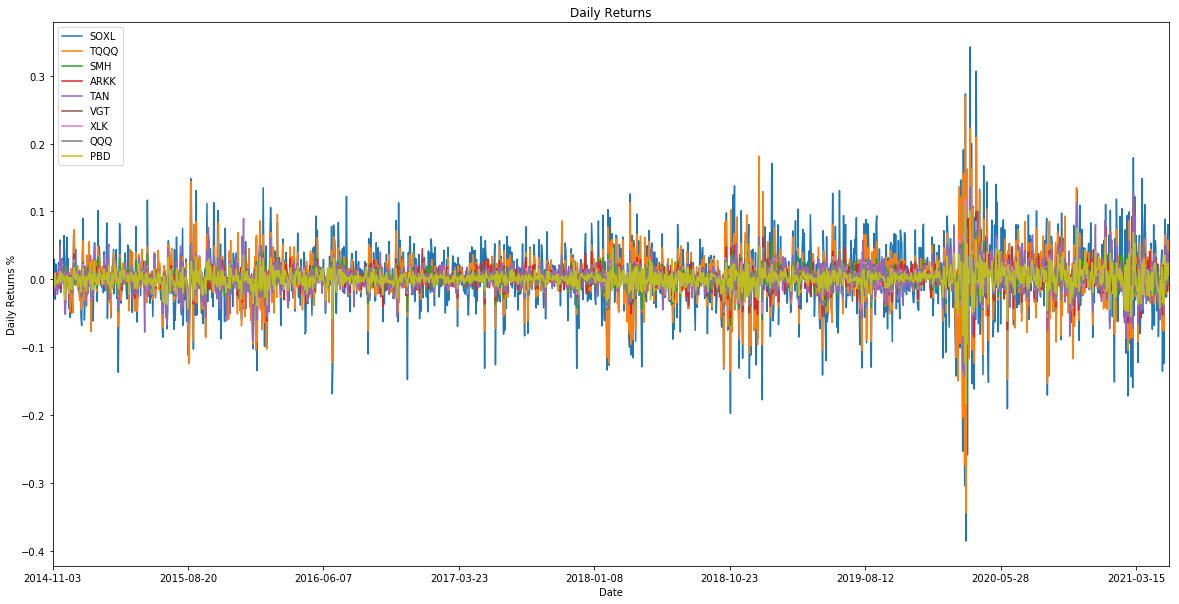

In [170]:
top_etf_rtn_plot = top_etf_rtn_df.plot(figsize=(20,10),title="Daily Returns")
top_etf_rtn_plot.set(ylabel='Daily Returns %')

In [166]:
# calculate cumulative returns
top_etf_cumrtn_df = (1 + top_etf_rtn_df).cumprod() - 1

[Text(0, 0.5, 'Cumulative Returns %')]

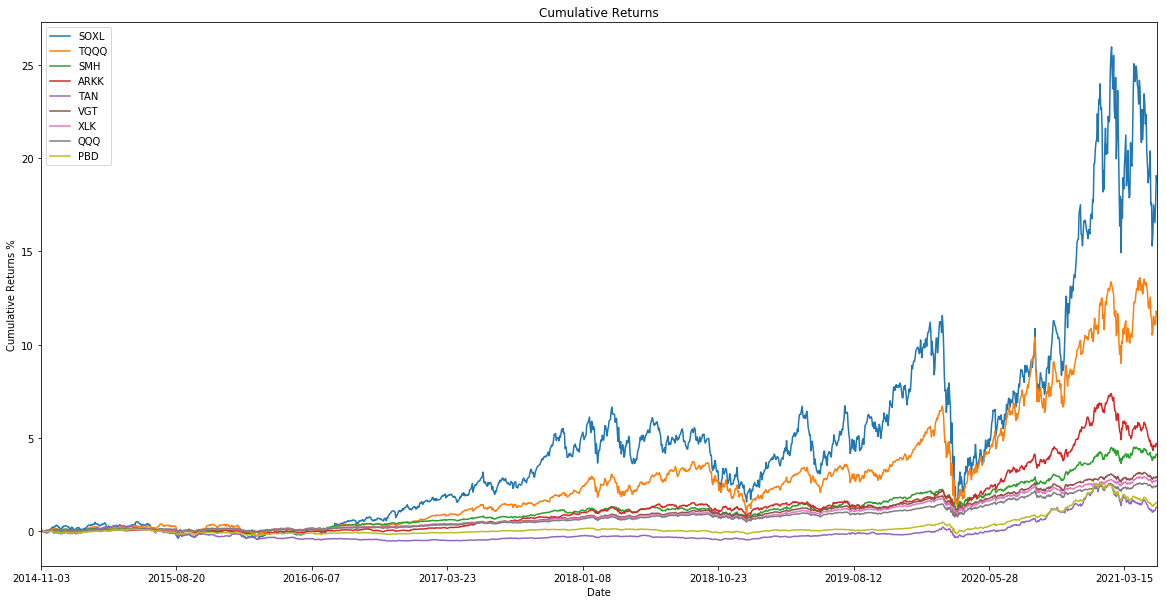

In [171]:
top_etf_cumrtn_plot = top_etf_cumrtn_df.plot(figsize=(20,10),title="Cumulative Returns")
top_etf_cumrtn_plot.set(ylabel='Cumulative Returns %')

[Text(0, 0.5, 'Standard Deviation')]

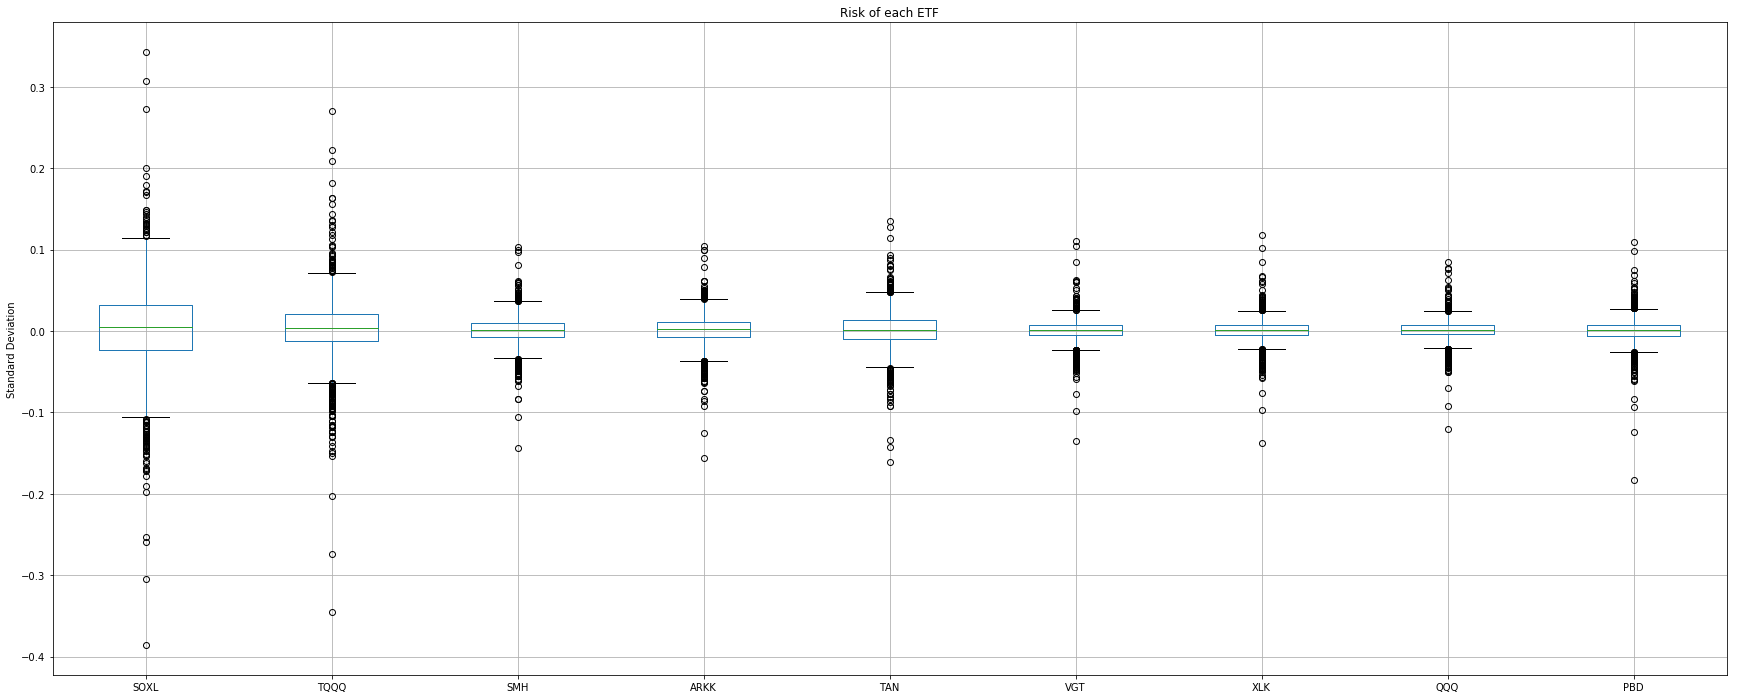

In [173]:
# Calculate and graph Standard Deviation for each ETF
top_etf_stddev_plot = top_etf_rtn_df.plot.box(figsize=(30,12), title='Risk of each ETF', grid=True)
top_etf_stddev_plot.set(ylabel='Standard Deviation')

In [174]:
# Calculate standard deviations
top_etf_daily_sd = top_etf_rtn_df.std()
top_etf_daily_sd

SOXL    0.053818
TQQQ    0.039528
SMH     0.017794
ARKK    0.019433
TAN     0.022908
VGT     0.014324
XLK     0.014295
QQQ     0.013401
PBD     0.015668
dtype: float64

In [ ]:
# SHOULD PULL THE SP500, or the two VANGARD FUnds WARREN BUFFET recommended, and compare them against these ETFs.
TO DO

In [178]:
# Calc Annualised Standard Deviation
trading_days = 252
top_etf_annualised_sd = top_etf_daily_sd * np.sqrt(trading_days)
top_etf_annualised_sd

SOXL    0.854339
TQQQ    0.627495
SMH     0.282468
ARKK    0.308485
TAN     0.363655
VGT     0.227388
XLK     0.226925
QQQ     0.212733
PBD     0.248719
dtype: float64

[Text(0, 0.5, 'Standard Deviation')]

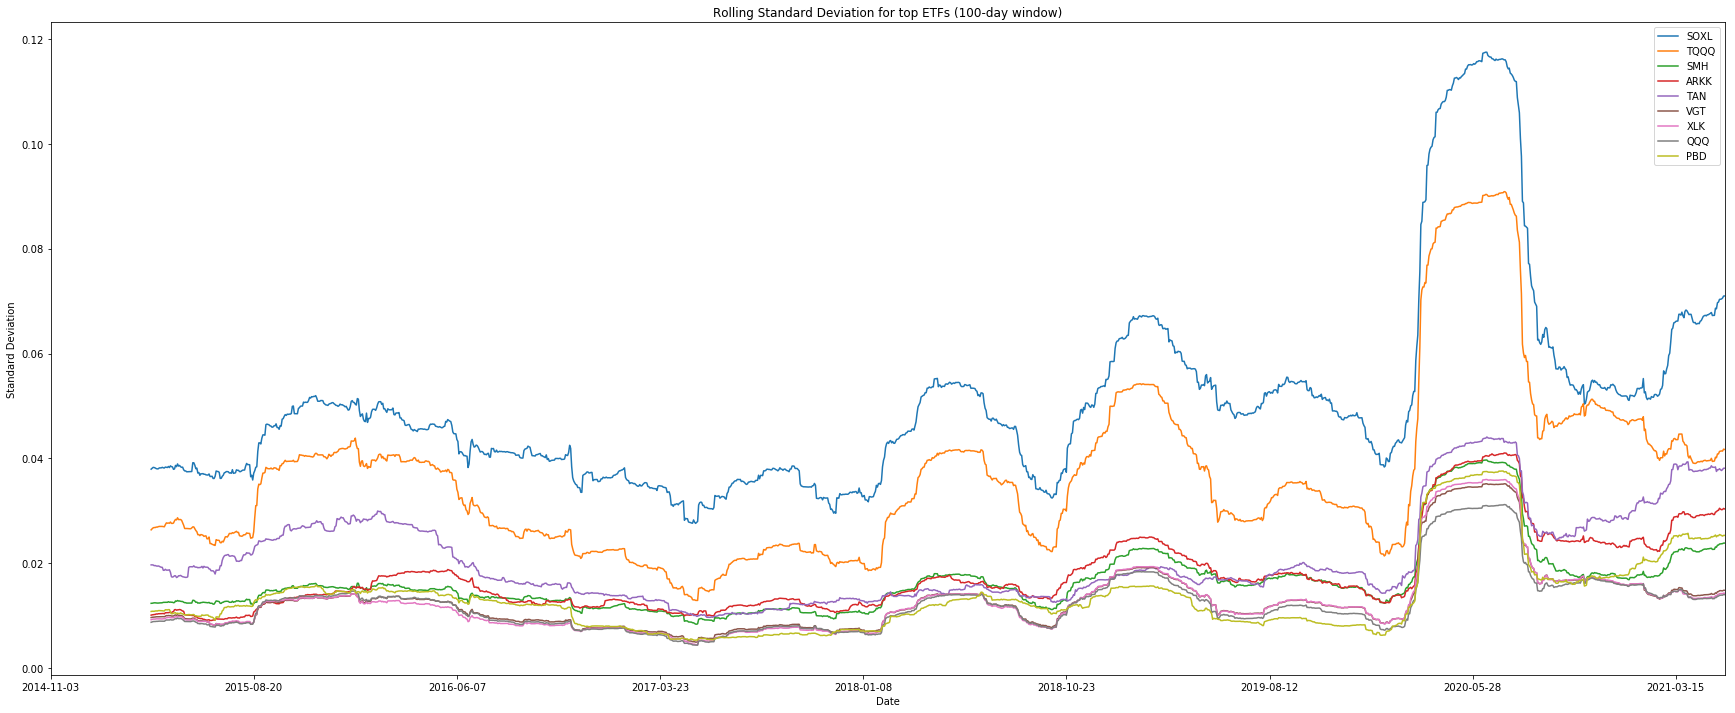

In [179]:
# Do rolling standard deviation, over 100 days
top_etf_rolling_sd = top_etf_rtn_df.rolling(window=100).std()
top_etf_roll_std_plot = top_etf_rolling_sd.plot(figsize=(30,12), title='Rolling Standard Deviation for top ETFs (100-day window)')
top_etf_roll_std_plot.set(ylabel='Standard Deviation')

In [182]:
# Review correlation between ETFs
top_etf_corr = top_etf_rtn_df.corr()
# Display the correlation matrix
top_etf_corr
#top_etf_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,SOXL,TQQQ,SMH,ARKK,TAN,VGT,XLK,QQQ,PBD
SOXL,1.000000,0.856043,0.988371,0.742617,0.625989,0.883183,0.870330,0.853332,0.698039
TQQQ,0.856043,1.000000,0.858877,0.789221,0.612767,0.977826,0.976518,0.998576,0.697352
SMH,0.988371,0.858877,1.000000,0.743559,0.626983,0.885194,0.874850,0.858865,0.708775
ARKK,0.742617,0.789221,0.743559,1.000000,0.636896,0.788044,0.761938,0.787565,0.683549
TAN,0.625989,0.612767,0.626983,0.636896,1.000000,0.625530,0.605402,0.613397,0.802867
VGT,0.883183,0.977826,0.885194,0.788044,0.625530,1.000000,0.994814,0.977046,0.717293
XLK,0.870330,0.976518,0.874850,0.761938,0.605402,0.994814,1.000000,0.976494,0.703803
QQQ,0.853332,0.998576,0.858865,0.787565,0.613397,0.977046,0.976494,1.000000,0.697457
PBD,0.698039,0.697352,0.708775,0.683549,0.802867,0.717293,0.703803,0.697457,1.000000


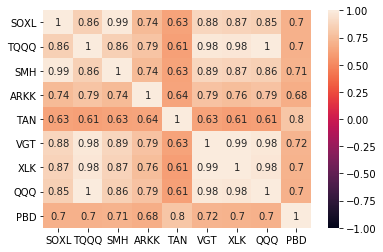

In [188]:
#plt.figure(figsize=(20, 10))
top_etf_corr_plot = sns.heatmap(top_etf_corr, vmin=-1, vmax=1, annot=True)  # -- vmin & vmax are optional
#plt.show()

In [189]:
# Analyse Sharpe Ratio
#sharpe ratio = (expected return of portfolio returns - risk-free rate) / standard deviation of portfolio returns

annual_sharpe_ratios = (top_etf_rtn_df.mean() - 0) / top_etf_annualised_sd  # -- assumption: risk-free rate is 0
print(annual_sharpe_ratios)

SOXL    0.003850
TQQQ    0.003721
SMH     0.004062
ARKK    0.004026
TAN     0.002106
VGT     0.004090
XLK     0.003958
QQQ     0.003927
PBD     0.002773
dtype: float64


[Text(0, 0.5, 'Sharpe Ratio')]

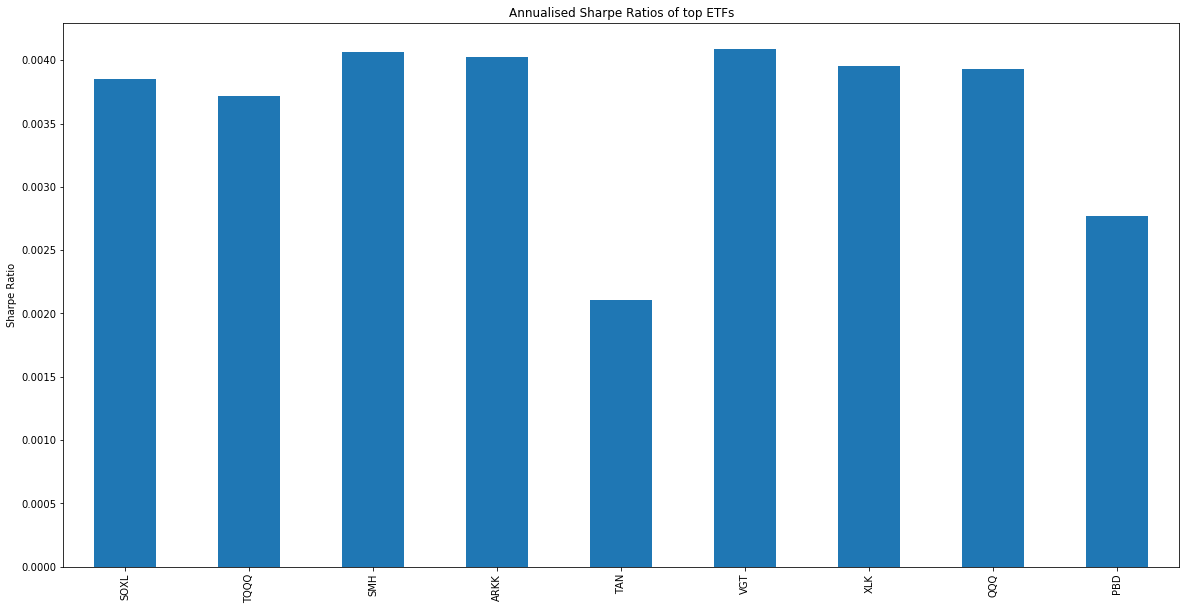

In [191]:
# Graph Sharpe Ratios
ann_sharpe_ratio_plot = annual_sharpe_ratios.plot.bar(figsize=(20,10), title='Annualised Sharpe Ratios of top ETFs')  # -- or annualised_sharpe_ratios.plot(kind='bar'...etc.)
ann_sharpe_ratio_plot.set(ylabel='Sharpe Ratio')
#plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--') 
#plt.show()